In [47]:
import pandas as pd
import geopandas as gpd
import datetime as date

import matplotlib.pyplot as plt
from shapely.geometry import Point

Reading the "Traffic_Crashes_-_People.csv" file into the variable crashes to create a pandas dataframe.

In [48]:
crashes = pd.read_csv('Traffic_Crashes_-_People.csv', low_memory = False)
print(crashes.columns.values.tolist())

['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID', 'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']


Converting the data in the 'CRASH_DATE' column from date and time type to just date type using the datetime library

In [49]:
crashes['CRASH_DATE'] = pd.to_datetime(crashes['CRASH_DATE']).dt.date

Extracting only the data from 8/1/2020 to 8/1/2022 and stored inside the variable dates.

In [50]:
dBefore = date.date(2020, 8, 1)
dAfter = date.date(2022, 8, 1)
dates = crashes[(crashes['CRASH_DATE'] > dBefore) & (crashes['CRASH_DATE'] < dAfter)]

Dropping the columns that will not be used in the future cells to visualize data.

In [51]:
toDrop = ['PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID', 'SEAT_NO', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'AIRBAG_DEPLOYED', 'EJECTION', 'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE', 'CELL_PHONE_USE']
dbCrashes = dates.drop(columns = toDrop)
dbCrashes = dbCrashes.dropna(thresh = 6)
dbCrashes.head()

,PERSON_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,INJURY_CLASSIFICATION
44,O1304796,2022-03-25,CHICAGO,IL,60641,M,28.0,SAFETY BELT USED,NO INDICATION OF INJURY
45,O1304797,2022-03-25,CHICAGO,IL,60651,M,27.0,SAFETY BELT USED,NO INDICATION OF INJURY
47,O1304802,2022-03-25,SKOKIE,IL,60076,F,29.0,SAFETY BELT USED,NO INDICATION OF INJURY
52,O1304805,2022-03-25,NEW IBERIA,LA,70563,M,58.0,USAGE UNKNOWN,NO INDICATION OF INJURY
53,O1304808,2022-03-25,VALPARAISO,IN,46383,M,32.0,SAFETY BELT USED,NONINCAPACITATING INJURY


All the 'INJURY_CLASSIFICATION' that were 'FATAL' are extracted from dbCrashes to create a new dataframe with just the crashes which ended up in death of the person. The data in the 'SAFETY_EQUIPMENT' column is then filtered to only have one of the following three: SAFETY BELT NOT USED, SAFETY BELT USED and NONE PRESENT.

In [66]:
fatal = dbCrashes[(dbCrashes['INJURY_CLASSIFICATION'] == 'FATAL')]
safety = fatal[(fatal['SAFETY_EQUIPMENT'] == 'SAFETY BELT NOT USED') | (fatal['SAFETY_EQUIPMENT'] == 'SAFETY BELT USED') | (fatal['SAFETY_EQUIPMENT'] == 'NONE PRESENT')]

The data is grouped by count to count the number of fatalities for each 'SAFETY_EQUIPMENT' data value. This is data is visualized using a bar chart to compare which 'SAFETY_EQUIPMENT' value had the least or most number of fatalities.

In [67]:
pCount = safety.groupby(fatal['SAFETY_EQUIPMENT']).count()
pCount = pCount.filter(['SAFETY_EQUIPMENT', 'NJURY_CLASSIFICATION'])

<AxesSubplot:title={'center':'Frequency vs Safety_Equipment for Fatal Injuries'}, ylabel='SAFETY_EQUIPMENT'>

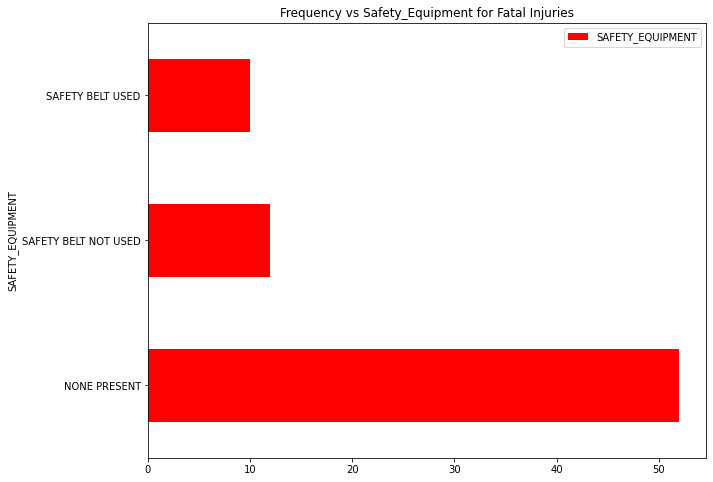

In [68]:
pCount.plot.barh(stacked=True, color = 'r', figsize=(10, 8), title = "Frequency vs Safety_Equipment for Fatal Injuries")

All the 'INJURY_CLASSIFICATION' that were not 'FATAL' are extracted from dbCrashes to create a new dataframe with just the crashes which ended up in death of the person. The data in the 'SAFETY_EQUIPMENT' column is then filtered to only have one of the following three: SAFETY BELT NOT USED, SAFETY BELT USED and NONE PRESENT.

In [69]:
nFatal = dbCrashes[(dbCrashes['INJURY_CLASSIFICATION'] != 'REPORTED, NOT EVIDENT') & (dbCrashes['INJURY_CLASSIFICATION'] != 'FATAL')]
safety = nFatal[(nFatal['SAFETY_EQUIPMENT'] == 'SAFETY BELT NOT USED') | (nFatal['SAFETY_EQUIPMENT'] == 'SAFETY BELT USED') | (nFatal['SAFETY_EQUIPMENT'] == 'NONE PRESENT')]

The data is grouped by count to count the number of fatalities for each 'SAFETY_EQUIPMENT' data value. This is data is visualized using a bar chart to compare which 'SAFETY_EQUIPMENT' value had the least or most number of injuries.

In [70]:
pCount = safety.groupby(nFatal['SAFETY_EQUIPMENT']).count()
pCount = pCount.filter(['SAFETY_EQUIPMENT', 'NJURY_CLASSIFICATION'])

<AxesSubplot:title={'center':'Frequency vs Safety_Equipment for Non-Fatal Injuries'}, ylabel='SAFETY_EQUIPMENT'>

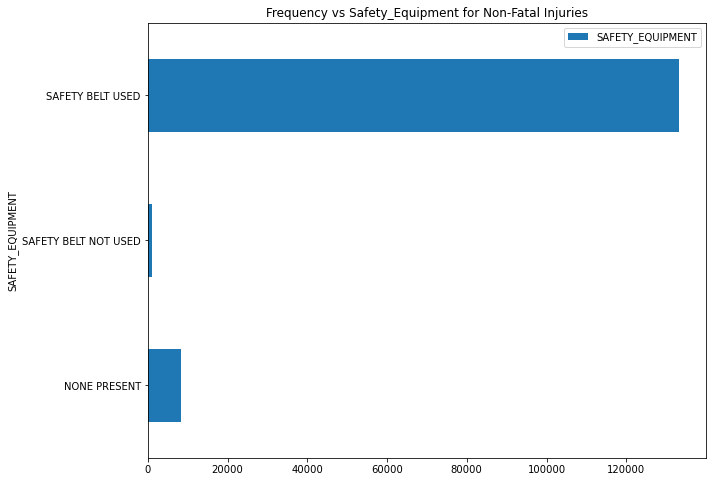

In [71]:
pCount.plot.barh(stacked=True, figsize=(10, 8), title = "Frequency vs Safety_Equipment for Non-Fatal Injuries")